In [28]:
%matplotlib inline

import six
import seaborn as sns
import matplotlib.pyplot as plt

from anc_state import AncState

In [2]:
"""
Descriptives of gestalt data for manuscript

First run:
python read_gestalt_data.py --reads ../../data/fish_7B_UMI_collapsed_reads.txt --out-obs _output/gestalt.pkl --log-file _output/log_gestsalt.txt --abundance-thres 0 --time 1
"""

''

In [3]:
with open("_output/gestalt.pkl", "rb") as f:
    gestalt_dict = six.moves.cPickle.load(f)

In [14]:
obs_data = gestalt_dict["obs_leaves"]
bcode_meta = gestalt_dict["bcode_meta"]

In [12]:
print("Number of total cells %d" % sum([o.abundance for o in obs_data]))
print("Number of unique alleles %d" % len(obs_data))

Number of total cells 197461
Number of unique alleles 1138


In [16]:
anc_states = [AncState.create_for_observed_allele(obs.allele_events_list[0], bcode_meta) for obs in obs_data]
targ_statuses = [anc_state.to_max_target_status() for anc_state in anc_states]

In [17]:
num_deacts = [targ_stat.num_deact_targets for targ_stat in targ_statuses]

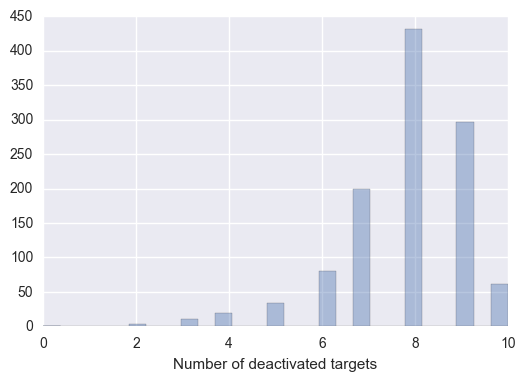

In [30]:
sns.distplot(num_deacts, kde=False, axlabel="Number of deactivated targets")
# plt.save_fig("../../gestaltamania-tex/manuscript/images/hist_num_deact.png")

In [42]:
all_events = [o.allele_events_list[0].events for o in obs_data]
uniq_events = set([evt for evts in all_events for evt in evts])
num_intertarg_events = sum([evt.min_target != evt.max_target for evt in uniq_events])
num_masking_events = sum([evt.min_target + 1 < evt.max_target for evt in uniq_events])
print("Number of uniq events %d" % len(uniq_events))
print("Number of uniq intertarg events %d" % num_intertarg_events)
print("Number of uniq masking events %d" % num_masking_events)

Number of uniq events 1140
Number of uniq intertarg events 207
Number of uniq masking events 109


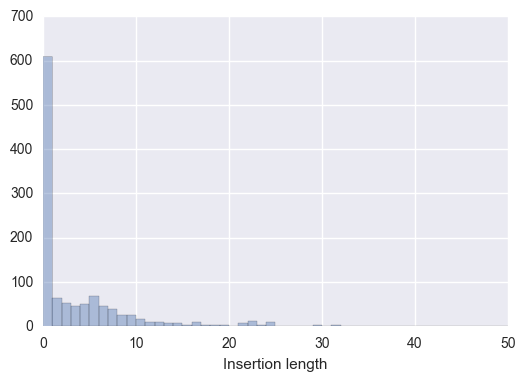

In [45]:
insert_lens = [len(evt.insert_str) for evt in uniq_events]
sns.distplot(insert_lens, kde=False, axlabel="Insertion length")

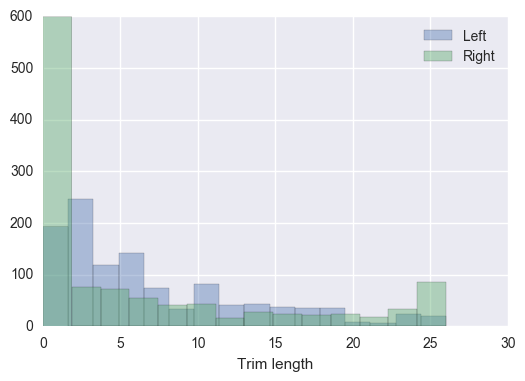

In [53]:
left_right_trim_lens = [evt.get_trim_lens(bcode_meta) for evt in uniq_events]
left_trim_lens = [l[0] for l in left_right_trim_lens]
right_trim_lens = [l[1] for l in left_right_trim_lens]
sns.distplot(left_trim_lens, kde=False, label="Left", axlabel="Trim length")
sns.distplot(right_trim_lens, kde=False, label="Right")
plt.legend()

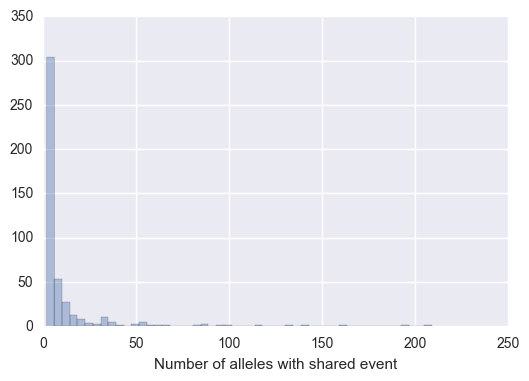

In [65]:
evt_appearance_counts = [sum([evt in obs.allele_events_list[0].events for obs in obs_data]) for evt in uniq_events]
sns.distplot(
    [ct for ct in evt_appearance_counts if ct > 1],
    kde=False,
    axlabel="Number of alleles with shared event")